# Oblig 2

Group 20: s364716 - Sara Lund

I chose to work with use case 1: Predict TESLA stock market price. I consider the regression algorithm as the best algorithm for this use case which I explained in the README-file.

## Imports

In [965]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pickle
import operator

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## Preparing the data

In [966]:
url = './TSLA.csv'
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'])


# A view of the first rows to see the structure of the data
print(df.head())

        Date      Open      High       Low     Close  Adj Close    Volume
0 2010-11-01  1.462667  1.516667  1.420667  1.427333   1.427333   6837000
1 2010-11-02  1.445333  1.458667  1.403333  1.416667   1.416667   4837500
2 2010-11-03  1.418667  1.500000  1.410667  1.451333   1.451333   5589000
3 2010-11-04  1.506667  1.688667  1.476667  1.660000   1.660000  28110000
4 2010-11-05  1.658000  1.664667  1.581333  1.629333   1.629333  15165000


## Look for correlations

In [967]:
# Correlation matrix
corrMatrix = df.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.767315,0.767473,0.767559,0.767588,0.767588,0.380125
Open,0.767315,1.000000,0.999724,0.999614,0.999202,0.999202,0.086238
High,0.767473,0.999724,1.000000,0.999623,0.999643,0.999643,0.089871
Low,0.767559,0.999614,0.999623,1.000000,0.999680,0.999680,0.082863
Close,0.767588,0.999202,0.999643,0.999680,1.000000,1.000000,0.087160
Adj Close,0.767588,0.999202,0.999643,0.999680,1.000000,1.000000,0.087160
Volume,0.380125,0.086238,0.089871,0.082863,0.087160,0.087160,1.000000


<Axes: xlabel='Date', ylabel='Close'>

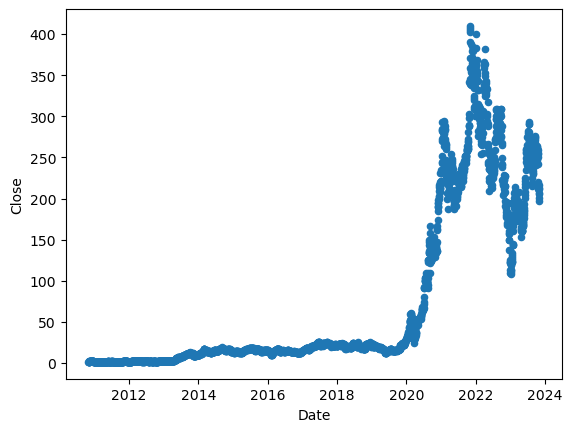

In [968]:
# Scatter plot
df.plot.scatter(x = 'Date', y = 'Close')

## Model training

I start off by splitting the data into training and testing. I created the variables X and y with the Date and Close columns because those are the only columns we need for the prediction and the training. It will help train the model to generalize unseen data as well.

In [969]:
# Since datetime doesn't work with linerRegression, we first need to convert it into another format

df['Date'] = df['Date'].apply(lambda x: x.toordinal())

print(df)

        Date        Open        High         Low       Close   Adj Close  \
0     734077    1.462667    1.516667    1.420667    1.427333    1.427333   
1     734078    1.445333    1.458667    1.403333    1.416667    1.416667   
2     734079    1.418667    1.500000    1.410667    1.451333    1.451333   
3     734080    1.506667    1.688667    1.476667    1.660000    1.660000   
4     734081    1.658000    1.664667    1.581333    1.629333    1.629333   
...      ...         ...         ...         ...         ...         ...   
3267  738818  215.880005  220.100006  212.199997  212.419998  212.419998   
3268  738819  211.320007  214.800003  204.880005  205.759995  205.759995   
3269  738820  210.600006  212.410004  205.770004  207.300003  207.300003   
3270  738823  209.279999  210.880005  194.669998  197.360001  197.360001   
3271  738824  196.119995  202.800003  194.070007  200.839996  200.839996   

         Volume  
0       6837000  
1       4837500  
2       5589000  
3      28110000

In [970]:
# Split into test and train

X = pd.DataFrame(df['Date'])
y = pd.DataFrame(df['Close'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [971]:
# We start creating the linear regression model and make predictions

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

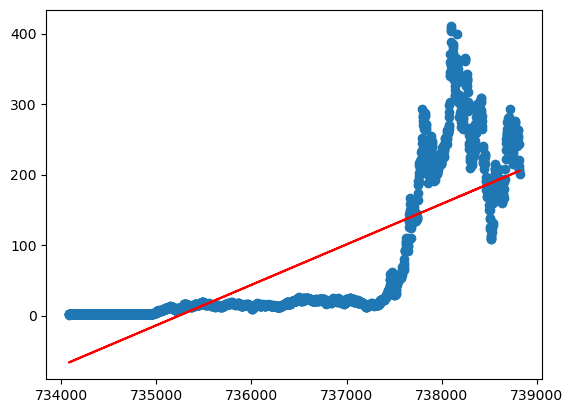

MSE = 4347.752081972211


In [972]:
# We create a scatter plot with the regression line as the prediction made by the mdoel
# It shows the relation between the training data and the model's predictions on the training data

plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

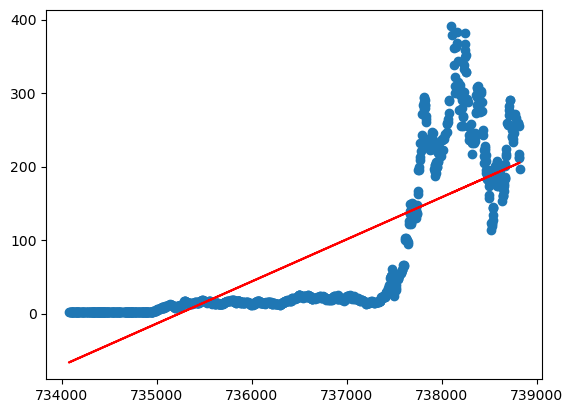

MSE = 3896.491962750912


In [973]:
# Here we make a new scatter plot that shows the relation between the test data and the models prediction on that test data
# This is to test unseen data

Y_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [974]:
# As you can see the MSE is at 3896

### Calculating percentage

In [975]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, Y_pred)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, Y_pred)

r_squared_percentage = r2 * 100

print("MSE = {:.2f}".format(mse))
print("R-squared = {:.2f}".format(r2))
print("Percentage accuracy = {:.2f}%".format(r_squared_percentage))

MSE = 3896.49
R-squared = 0.61
Percentage accuracy = 60.58%


## Saving the model

In [976]:
# Save the model
filename = 'model.sav'

# Now we can use the model later on and make predictions
# Load the file
pickle.dump(model, open(filename, 'wb'))

# We enter a random date
new_data = pd.DataFrame({'Date': ['2023-02-02']})

# Convert to numerical format like we did earlier
new_data['Date'] = pd.to_datetime(new_data['Date']).apply(lambda x: x.toordinal())

# Make the prediction
predictions = loaded_model.predict(new_data)

print(predictions)
print("The real Close value on this date is 188.270004.")

[[189.86743183]]
The real Close value on this date is 188.270004.
